## K Means Clustering

Basic example of K Means Clustering implementation

### About the Data

The healthcare_CyberAttacks dataset is an aggregated table that contains number of attacks and total affected people by state and it was derived from the Breach Report Dataset that contains information about resolved cyber attack cases reported to HIPPA from 10/2009 to 01/2023

Variables:

* State
* Individuals Affected
* attacks

## 1. Importing Libraries

In [1]:
# data handling and formating
import pandas as pd
import numpy as np

# vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing KMeans method
from sklearn.cluster import KMeans

# scaling data
from sklearn.preprocessing import MinMaxScaler

# to compute distances
from scipy.spatial.distance import cdist

# supressing warnings
import warnings
warnings.simplefilter('ignore')

## 2. Data Load & Overview

In [2]:
# importing data
data = pd.read_csv('../Data/healthcare_CyberAttacks.csv')

In [3]:
# creating a copy to avoid permanent changes
df = data.copy()

In [4]:
# looking at the size of the dataset
print(f' *There are {df.shape[0]} observations')
print(f' *There are {df.shape[1]} variables including a dependant variable')

 *There are 52 observations
 *There are 3 variables including a dependant variable


In [5]:
# looking at the data
df.head()

,State,Individuals Affected,attacks
0,AK,500000.0,19
1,AL,8702.0,51
2,AR,8871.0,60
3,AZ,1337.0,100
4,CA,2646.0,461


* data contains total number of affected individuals by state and total number of attacks by state
* data is from 10/2009 to 01/2023

In [6]:
# looking for missing values
df.isnull().sum()

State                   0
Individuals Affected    0
attacks                 0
dtype: int64

* There are no missing values

In [7]:
df.dtypes

State                    object
Individuals Affected    float64
attacks                   int64
dtype: object

## 3. Data Preprocessing

* K Means can not handle categorical/object types therefore we will only use Individuals `Affected` and `attacks`
* K Means means deals with distances therefore we will have to scale our data for better results

In [8]:
# we will create a dataframe with the numerical variables only
training = df[['Individuals Affected', 'attacks']]

In [9]:
# defining scaler
scaler = MinMaxScaler()
# creating new dataset with scaled values
df_scaled = pd.DataFrame(scaler.fit_transform(training), columns=training.columns)

## 4. Model

* Select the best number of clusters (k)
* Build model
* visualize clusters
* Analyze clusters

## 4.1 Selecting best number of clusters (k)

we will use an elbow plot to do this step

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

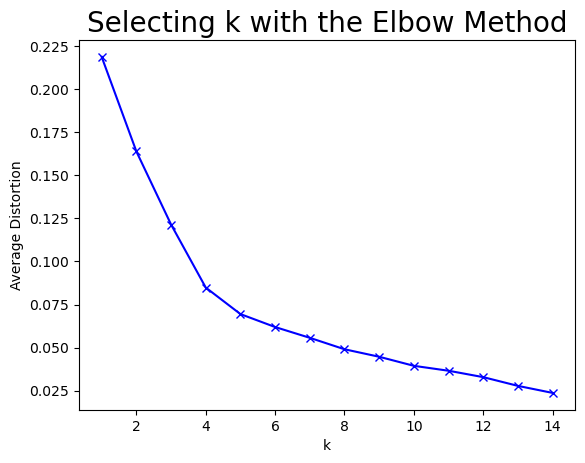

In [10]:
# number of clusters to test
clusters = range(1, 15)

# empty list to store mean dissortion
meanDistortions = []

# looping through different number of clusters
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = (
        sum(
            np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / df_scaled.shape[0]
    )

    meanDistortions.append(distortion)

# creating elbow plot
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* From the elbow test it seems like k = 4 is the best option judging from the diminishing returns

## 4.2 Building Model

Building model and creating clusters

In [11]:
# Apply K-means clustering with k=4 
kmeans = KMeans(n_clusters=4, random_state=123)

# creating clusters
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the dataframe
df_scaled['cluster'] = clusters

## 4.3 Visualize Clusters

[Text(0.5, 1.0, 'K-Means Clustering')]

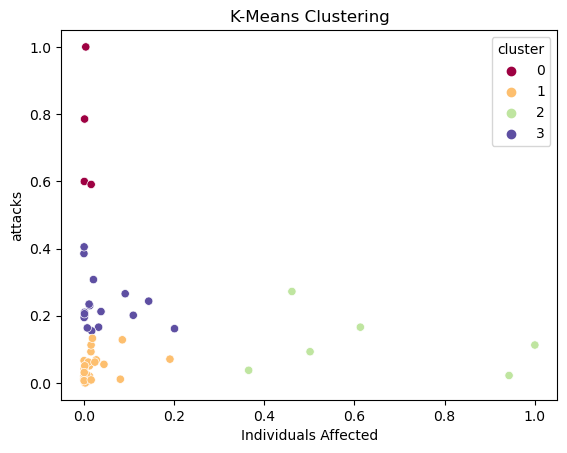

In [12]:
sns.scatterplot(data=df_scaled, x="Individuals Affected", y="attacks", hue=df_scaled['cluster'], palette='Spectral').set(title='K-Means Clustering')

* `Cluster 0`: contains the states that are frequently targeted but also have really low affected individuals
    - Highly targeted, High Security
* `Cluster 3`: contains the states that are not targeted too often and have relatively low affected individuals
    - Somewhat targeted, Medium security
* `Cluster 1`: contains the states that are rarely targeted and have low number of affected individuals
    - Rarely targeted, Can't really says much about their security
* `Cluster 2`: contains the states that are not highly targeted but have the highest numbers of affected individuals
    - Rarely targeted, Low Security

## 4.4 Analyze Clusters

In [13]:
# adding clusters to original data
df['cluster'] = df_scaled['cluster']

In [14]:
# looping through clusters and returning its state members and summary statistics
for cluster in df['cluster'].unique():
    print('''\nCluster {} Details:\n '''.format(cluster))
    cluster_data = df[df['cluster']==cluster]
    print(f'States in this cluster: {list(cluster_data.State)}\n')
    display(cluster_data[['Individuals Affected','attacks']].describe().T)
    print('='*150)


Cluster 2 Details:
 
States in this cluster: ['AK', 'CT', 'GA', 'IA', 'SC', 'WV']



,count,mean,std,min,25%,50%,75%,max
Individuals Affected,6.0,343438.666667,139835.383748,194035.0,250180.00,295724.0,456319.5,530299.0
attacks,6.0,62.000000,41.602885,19.0,32.25,55.5,78.0,132.0



Cluster 1 Details:
 
States in this cluster: ['AL', 'AR', 'DC', 'DE', 'HI', 'ID', 'KS', 'LA', 'ME', 'MS', 'MT', 'ND', 'NE', 'NH', 'NM', 'NV', 'OK', 'OR', 'PR', 'RI', 'SD', 'UT', 'VT', 'WI', 'WY']



,count,mean,std,min,25%,50%,75%,max
Individuals Affected,25.0,12742.08,22081.190647,520.0,1432.0,5535.0,10467.0,101541.0
attacks,25.0,29.76,17.863557,9.0,14.0,28.0,39.0,69.0



Cluster 3 Details:
 
States in this cluster: ['AZ', 'CO', 'IL', 'IN', 'KY', 'MA', 'MD', 'MI', 'MN', 'MO', 'NC', 'NJ', 'OH', 'PA', 'TN', 'VA', 'WA']



,count,mean,std,min,25%,50%,75%,max
Individuals Affected,17.0,22006.352941,31582.317929,500.0,1100.0,7250.0,20533.0,106910.0
attacks,17.0,113.823529,32.947373,79.0,97.0,104.0,119.0,192.0



Cluster 0 Details:
 
States in this cluster: ['CA', 'FL', 'NY', 'TX']



,count,mean,std,min,25%,50%,75%,max
Individuals Affected,4.0,3453.00,3758.740303,941.0,1169.0,1945.5,4229.50,8980.0
attacks,4.0,345.25,87.183236,276.0,279.0,322.0,388.25,461.0
